# Implementation Code for Locality Sensitive Hashing algorithm

### *****PLEASE RESTART RUNTIME AND RUN ALL CELLS IN NOTEBOOK*****

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CODE BLOCK #1: Defining sentences to work with

In [2]:
sa = "Earth is the third planet"
sb = "USA is the third largest country"
sc = "Pluto is the nineth planet"

# CODE BLOCK #2: Create k-shingles where it is unlikely to produce matching shingles between non matching text. We will test this for k=2, 9

In [3]:
#k = 2
k = 9

for i in range(len(sa) - k+1):
    print(sa[i: i+k], end='|')
print('\n')
for i in range(len(sb) - k+1):
    print(sb[i: i+k], end='|')
print('\n')
for i in range(len(sc) - k+1):
    print(sc[i: i+k], end='|')

Earth is |arth is t|rth is th|th is the|h is the | is the t|is the th|s the thi| the thir|the third|he third |e third p| third pl|third pla|hird plan|ird plane|rd planet|

USA is th|SA is the|A is the | is the t|is the th|s the thi| the thir|the third|he third |e third l| third la|third lar|hird larg|ird large|rd larges|d largest| largest |largest c|argest co|rgest cou|gest coun|est count|st countr|t country|

Pluto is |luto is t|uto is th|to is the|o is the | is the n|is the ni|s the nin| the nine|the ninet|he nineth|e nineth | nineth p|nineth pl|ineth pla|neth plan|eth plane|th planet|

Duplicate value in the sentence shingles are removed using the Python type `set`. This is achieved by invoking the 'shingle' function for each sentence.

In [4]:
def shingle(text: str, k: int):
    shingle_set = []
    for i in range(len(text) - k+1):
        shingle_set.append(text[i:i+k])
    return set(shingle_set)

a = shingle(sa, k)
b = shingle(sb, k)
c = shingle(sc, k)

print(len(a), ", ", a)
print(len(b), ", ", b)
print(len(c), ", ", c)

17 ,  {'h is the ', 'th is the', 'the third', 'ird plane', 'Earth is ', 'arth is t', ' third pl', 'third pla', ' the thir', ' is the t', 's the thi', 'e third p', 'rd planet', 'he third ', 'is the th', 'rth is th', 'hird plan'}
24 ,  {' third la', 'SA is the', 'est count', 'hird larg', 's the thi', 'gest coun', 'st countr', 'the third', 'argest co', 'is the th', 'third lar', 'rgest cou', 'd largest', 'e third l', 'he third ', ' the thir', ' largest ', 'A is the ', 'USA is th', 'ird large', 't country', 'largest c', ' is the t', 'rd larges'}
18 ,  {'nineth pl', 'to is the', 'neth plan', 'o is the ', 'luto is t', ' is the n', 'eth plane', 'th planet', ' the nine', ' nineth p', 'e nineth ', 's the nin', 'the ninet', 'he nineth', 'ineth pla', 'Pluto is ', 'is the ni', 'uto is th'}


Jaccard similarity metric is used to match similarity between sentences. It is measured by the ratio of count of shingles common between a sentence pairMeasure matching shingles between any two sentence pairs. As shingles size increase, the count of matching shingles between 
sentences (a, b) reduce.



In [5]:
def jaccard(a: set, b: set):
    return len(a.intersection(b)) / len(a.union(b))

In [6]:
jaccard(a, b), jaccard(b, c), jaccard(a, c)

(0.17142857142857143, 0.0, 0.0)

# CODE BLOCK #3 With billions of documents, the processing of k-shingle sets for similarity, raises time and space complexity issues. Following code blocks address this. Focus of this code block is on the second step of LSH, namely MinHashing

First we create a shingle vocabulary by creating a `union` between all three sets.

In [7]:
vocab = list(a.union(b).union(c))
print(len(vocab), vocab)

53 [' third la', 'nineth pl', 'th is the', 'neth plan', 'luto is t', 'SA is the', 'est count', ' nineth p', 'third pla', 'e nineth ', 's the nin', 'hird larg', 's the thi', 'Pluto is ', 'gest coun', 'st countr', 'the third', 'ird plane', 'argest co', 'arth is t', 'o is the ', 'eth plane', 'th planet', 'ineth pla', 'he nineth', 'e third p', 'is the th', 'uto is th', 'h is the ', 'to is the', 'third lar', 'rgest cou', 'd largest', ' the nine', 'rd planet', 'he third ', 'e third l', ' the thir', 'rth is th', 'hird plan', 'Earth is ', ' largest ', ' is the n', 'A is the ', 'USA is th', 'ird large', 't country', 'largest c', 'the ninet', ' is the t', ' third pl', 'is the ni', 'rd larges']


Using this vocab we create one-hot encoded sparse vectors to represent the three shingles set.

In [8]:
a_1hot = [1 if x in a else 0 for x in vocab]
b_1hot = [1 if x in b else 0 for x in vocab]
c_1hot = [1 if x in c else 0 for x in vocab]
print(len(a_1hot), a_1hot)
print(len(b_1hot), b_1hot)
print(len(c_1hot), c_1hot)

53 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
53 [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1]
53 [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [9]:
hash_ex = list(range(1, len(vocab)+1))
print(hash_ex)  # we haven't shuffled yet

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]




Step 1: Create say, 200 hash functions.
 
(This is so as to emulate the processing of a large count of input documents - not just 3 sentences - as in our toy example)

Step 2: Count up from 1 to len(vocab) + 1 and find if the resultant hash_ex.index(i) position in our one-hot encoded vectors contains a positive value (1) in that position

Step 3: If so, append the index position to our signature for that vector.

Thus, we simply process each one-hot vector through each hash function, appending the output value to our signature for that vector.

In [10]:
def create_hash_func(size: int):
    # function for creating the hash vector/function
    hash_ex = list(range(1, size+1))
    random.shuffle(hash_ex)
    return hash_ex

def build_minhash_func(vocab_size: int, nbits: int):
    # function for building multiple minhash vectors
    hashes = []
    for _ in range(nbits):
        hashes.append(create_hash_func(vocab_size))
    return hashes

# we create 200 minhash vectors
minhash_func = build_minhash_func(len(vocab), 200)
#for i in range(200):
#    print(f"hash function {i+1}:")
#    print(minhash_func[i])

In [11]:
def create_hash(vector: list):
    # use this function for creating our signatures (eg the matching)
    signature = []
    for func in minhash_func:
        for i in range(1, len(vocab)+1):
            idx = func.index(i)
            signature_val = vector[idx]
            if signature_val == 1:
                signature.append(idx)
#                print(f"{i} -> {idx} -> {signature_val}")
                break
    return signature

# now create signatures
#print(len(a_1hot), a_1hot)
a_sig = create_hash(a_1hot)
print("a_sig", a_sig)

#print("\n", len(b_1hot), b_1hot)
b_sig = create_hash(b_1hot)
print("b_sig", b_sig)

#print("\n", len(c_1hot), c_1hot)
c_sig = create_hash(c_1hot)
print("c_sig", c_sig)

a_sig [8, 8, 26, 19, 8, 49, 34, 39, 49, 16, 19, 50, 25, 2, 16, 39, 34, 8, 37, 12, 8, 17, 17, 40, 25, 50, 26, 8, 8, 39, 16, 40, 35, 8, 40, 8, 12, 12, 12, 37, 8, 25, 49, 34, 37, 19, 37, 25, 12, 40, 50, 16, 12, 26, 38, 26, 25, 12, 28, 25, 8, 49, 16, 28, 16, 39, 25, 8, 28, 49, 39, 26, 12, 17, 28, 28, 2, 34, 26, 40, 40, 28, 16, 40, 34, 49, 28, 39, 39, 50, 50, 34, 39, 12, 39, 50, 37, 37, 49, 25, 40, 50, 37, 25, 50, 40, 26, 40, 50, 34, 35, 25, 49, 16, 40, 2, 39, 35, 38, 8, 19, 26, 40, 49, 16, 8, 8, 40, 2, 39, 19, 25, 35, 8, 39, 40, 19, 8, 8, 28, 19, 12, 35, 34, 40, 17, 19, 35, 8, 39, 26, 34, 37, 26, 26, 16, 34, 35, 2, 26, 19, 28, 8, 38, 8, 2, 25, 34, 35, 12, 40, 49, 28, 35, 50, 39, 28, 8, 19, 39, 8, 17, 19, 12, 38, 2, 16, 34, 25, 25, 16, 49, 35, 17, 19, 2, 34, 26, 49, 2]
b_sig [49, 30, 26, 31, 46, 15, 46, 46, 49, 16, 32, 30, 6, 45, 16, 11, 41, 31, 11, 12, 18, 0, 11, 47, 44, 43, 46, 18, 30, 18, 32, 15, 0, 47, 6, 52, 32, 45, 12, 37, 0, 0, 49, 5, 0, 32, 45, 36, 0, 15, 31, 41, 12, 43, 12, 26, 31,

We now have our three minhashed signatures. These signatures, despite being seemingly randomized, has on average the very similar Jaccard similarity values as our previous sparse vectors.


In [12]:
jaccard(a, b), jaccard(set(a_sig), set(b_sig))

(0.17142857142857143, 0.17142857142857143)

In [13]:
jaccard(b, c), jaccard(set(b_sig), set(c_sig))

(0.0, 0.0)

In [14]:
jaccard(a, c), jaccard(set(a_sig), set(c_sig))

(0.0, 0.0)

# CODE BLOCK #4: Locality Sensitive Hashing

The signature vector is broken into multiple *bands*, creating several sub-vectors. Each band shall contain an equal number of rows `r` - and so our signature length must be divisible by `b`.

In [15]:
def split_vector(signature, b):
    assert len(signature) % b == 0
    r = int(len(signature) / b)
    # code splitting signature in b parts
    subvecs = []
    for i in range(0, len(signature), r):
        subvecs.append(signature[i : i+r])
    return subvecs

We'll start by splitting into 100 bands, creating rows of `2`

In [16]:
band_a = split_vector(a_sig, 100)
band_b = split_vector(b_sig, 100)
band_c = split_vector(c_sig, 100)

Check if they match

In [17]:
for b_rows, c_rows in zip(band_b, band_c):
    if b_rows == c_rows:
        print(f"Candidate pair: {b_rows} == {c_rows}")

In [18]:
for a_rows, b_rows in zip(band_a, band_b):
    if a_rows == b_rows:
        print(f"Candidate pair: {a_rows} == {b_rows}")

Candidate pair: [49, 16] == [49, 16]
Candidate pair: [12, 37] == [12, 37]
Candidate pair: [37, 37] == [37, 37]
Candidate pair: [49, 16] == [49, 16]
Candidate pair: [26, 16] == [26, 16]


In [19]:
for a_rows, c_rows in zip(band_a, band_c):
    if a_rows == c_rows:
        print(f"Candidate pair: {a_rows} == {c_rows}")

# We identify that sentences **a** and **b** have candidate pairs, and identify **c** as a non-candidate.


# CODE BLOCK#5: Tuning LSH

We can visualize the probability of returning a candidate pair vs the similarity of the pair for different values of `r` and `b` (rows and bands respectively) like so:

In [20]:
def probability(s, r, b):
    # s: similarity
    # r: rows (per band)
    # b: number of bands
    return 1 - (1 - s**r)**b

In [21]:
results = pd.DataFrame({
    's': [],
    'P': [],
    'r,b': []
})

#for s in np.arange(0.01, 1, 0.01):
for s in np.arange(0.1, 1, 0.1):
    total = 200
    for b in [100, 50, 40, 20, 10, 5]:
        r = int(total/b)
        P = probability(s, r, b)
        results = results.append({
            's': s,
            'P': P,
            'r,b': f"{r},{b}"
        }, ignore_index=True)
#print(results)

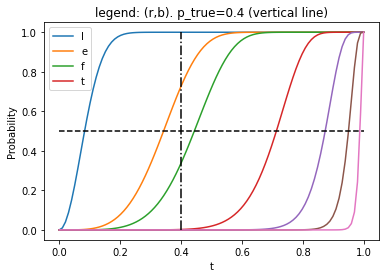

In [22]:
import matplotlib.pyplot as plt
ops = [(2, 100), (4, 50), (5, 40), (10, 20), (20 ,10), (40, 5), (100, 2)]
yval = lambda p,r,b: 1-(1-p**r)**b
pts = np.linspace(0,1,100)
yval(pts,.2,.2)
for op in ops:
    plt.plot(pts, yval(pts,op[0],op[1]), label=op)
plt.plot(pts,0*pts+0.5,'k--', label="P=1/2")
plt.plot([0.4,0.4],[0,1], 'k-.')
plt.legend('left')
plt.xlabel('t')
plt.ylabel('Probability')
plt.title("legend: (r,b). p_true=0.4 (vertical line)")
plt.show()